In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it 
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/" 
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 93 (delta 21), reused 84 (delta 14), pack-reused 0
Unpacking objects: 100% (93/93), done.


# Regression

In regression we predict **values** rather than discrete labels. 
In the simplest case we want to fit a line through a set of points - simple linear regression.
A straight-line is a model of the form,

$y=mx+b$

where m is the *slope* and b is the *intercept*.  Let's try this with synthetic dataset,


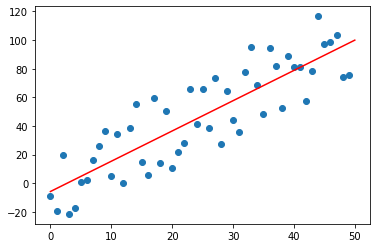

Slope: 2.12
Intercept: -5.83
R^2 score: 0.74


In [2]:
import matplotlib.pyplot as plt
import random
import pandas as pd

# data parameters
m = 2        # slope
b = -1       # intercept
n = 50       # number of points to generate
y_range = 30 # governs the level of noise on the y coordinate
y_noise = pd.DataFrame([random.uniform(-y_range,y_range) for _ in range(n)])

# generate the (x,y) points of our dataset
x = pd.DataFrame([i for i in range(n)])
y = m * x + b + y_noise

# linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# plot the model together with the data                                                                              
xfit = pd.DataFrame([0,n])
yfit = pd.DataFrame(model.predict(xfit))
plt.scatter(x, y)
plt.plot(list(xfit[0]), list(yfit[0]),"r-")
plt.show()

# print model parameters
print("Slope: {:3.2f}".format(model.coef_[0][0]))
print("Intercept: {:3.2f}".format(model.intercept_[0]))

# compute the R^2 score
rs = model.score(x,y)
print("R^2 score: {:3.2f}".format(rs))

# Another Look at the $R^2$ Score

The $R^2$ score is a score that compares the errors squared of the regression model to the errors squared of a default model.
The default model is just the average value $\bar{y}$ of all y-values.  That is, for any x-value the model always returns the same answer: $\bar{y}$.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/rs.png" height="400" width="460">

(Source: [Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination))

Let's explore that figure a little bit more assuming that we have a training dataset that consists of the set of points,

$\{(x_1,y_1), (x_2,y_2),\dots,(x_n,y_n)\}$

where $x_i$ are the values of the independent variable and $y_i$ are the values of the dependent variable. Then the we have the following definitions,

1. The **default model** is defined as $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$, the average of the expected outcomes $y_i$ of the training data.
1. The regression model is $f$ and the **residuals** are defined as $y_i - f(x_i)$ for $i=1\ldots n$, that is, a residual is the difference between the expected outcome $y_i$ at point $x_i$ minus the outcome computed by the model $f(x_i)$.
1. $SS_{\rm res}$ is the squared sum of the residuals of the model $f$, more precisely, $SS_{\rm res} = \sum_{i=1}^n (y_i - f(x_i))^2$.
1. $SS_{\rm tot}$ is the squared sum of the residuals of the default model $\bar{y}$, more precisely, $SS_{\rm tot} = \sum_{i=1}^n (y_i - \bar{y})^2$.

With these definitions we can now compute the $R^2$ score as

$R^2 
= 1 - \frac{SS_{\rm res}}{SS_{\rm tot}} 
= 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2} 
$

Notice that if the performance of our regression model $f$ approaches the performance of our default model $\bar{y}$ then the 
score will be,

$R^2 \approx 1 - 1 = 0$

If our model $f$ is perfect, that is, all residuals $y_i - f(x_i)$ are equal to zero then we obtain the score,

$R^2 = 1 - 0 = 1$

That means, the closer an $R^2$ score is to one the better the model.  It turns out that if our model $f$ is worse than the default model $\bar{y}$ then it is possible to obtain negative $R^2$ values.

## Computing the $R^2$ Score for a Model

Now that we know how to compute the $R^2$ score let's build a linear model on the cars dataset and compute it's $R^2$ score.

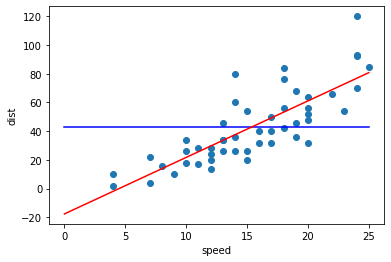

Sklearn R^2 score: 0.65
Our R^2 score: 0.65


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from confint import regression_confint

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(cars_df[['speed']].values,cars_df[['dist']])

# plot the models ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')
# x-values for model eval: 0, 25
x = [0,25]
# plot the default model
mean = cars_df[['dist']].mean(axis=0)[0]
plt.plot(x,[mean,mean],"b-")
# plot the regression model
f = pd.DataFrame(model.predict(pd.DataFrame(x)))
plt.plot(x,list(f[0]),"r-")
# show it
plt.show()

# compute the R^2 score using sklearn
rs = model.score(cars_df[['speed']].values,cars_df[['dist']])
print("Sklearn R^2 score: {:3.2f}".format(rs))

# compute the R^2 score using the formula from above
x = cars_df[['speed']]
y = cars_df[['dist']]
y_mean = cars_df[['dist']].mean(axis=0)[0]
# model predictions
f = pd.DataFrame(model.predict(x.values),columns = ['dist'])
# Sum Squared
SSres = ((y - f)**2).sum(axis=0)[0]
SStot = ((y - y_mean)**2).sum(axis=0)[0]
# R^2 score
rs = 1 - (SSres/SStot)
print("Our R^2 score: {:3.2f}".format(rs))

The blue line in the figure above is the default model and the red line is the linear regression model.  It is satisfying to see that the $R^2$ score of SKlearn and the one due to our computation coincide.

On the Python front the  two lines,
```python
SSres = ((y - f)**2).sum(axis=0)[0]
SStot = ((y - y_mean)**2).sum(axis=0)[0]
```
in the Python code above look somewhat perplexing because they look like scalar computation but are in fact vector operations. That is because we carefully mapped our data such as `x`, `y`, and `f` into Pandas dataframes and operations such as addition, subtraction, and taking something to the power of 2 support *broadcasting* and *vector operations*.  Here, these operations apply the operators on an element-by-element basis and produce a result dataframe.  The result dataframe, in turn, has a member function `sum`, which when given the `axis` parameter 0, sum values down the columns of a dataframe producing a sum vector.  Here we grab the first element of that sum vector.

# Regression Models

Turns out that all the classification models we have covered so far also support regression models:

* Regression Trees (we have seen these before when we discussed non-linear regression)
* KNN Regression Models
* MLP Regression Models

## Regression Trees

Below is the code to construct a regression tree on the cars dataset.  Here we restrict the complexity of the tree to a depth of 2.

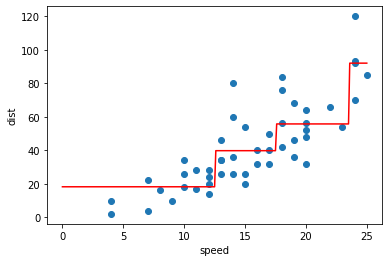

R^2 score: 0.73 (0.60, 0.85)


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from confint import regression_confint

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# pick model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2) 
model.fit(cars_df[['speed']].values,cars_df[['dist']])

# plot the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

# plot the model
# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")

plt.show()

# compute the R^2 score 
rs = model.score(cars_df[['speed']].values,cars_df[['dist']])
obs = cars_df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

## KNN Regression

KNN regression is interesting in that we are not asking the neighbors for a majority label but instead we compute the average value associated with the neighbors and that becomes the value of the current point.

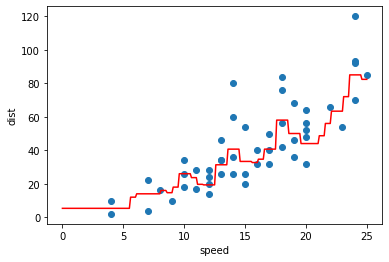

R^2 score: 0.75 (0.64, 0.86)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from confint import regression_confint

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# pick model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(cars_df[['speed']].values,cars_df[['dist']])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")
plt.show()

# compute the R^2 score 
rs = model.score(cars_df[['speed']].values,cars_df[['dist']])
obs = cars_df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

## MLP Regression

In MLP regression we ask the network to model a continuous value.  This turns out to be just a change in interpretation of the output value.  Rather than applying a thresholding function to the output like the `sign` function we just use the raw output value as the model output value.

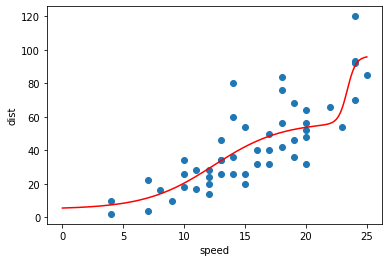

R^2 score: 0.70 (0.57, 0.84)


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from confint import regression_confint

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(2,), activation='tanh', max_iter=100000)
model.fit(cars_df[['speed']].values,cars_df['dist'])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")
plt.show()

# compute the R^2 score 
rs = model.score(cars_df[['speed']].values,cars_df['dist'])
obs = cars_df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))


# Regression and Grid Search: Tree Regression

Just like in classification, regression models are built using a small sample of a possibly infinite data universe and we have to estimate the model parameters for the best model using this small sample...that means we have to perform a grid search over parameter ranges and we want to use cross-validation to minimize the bias of any one particular training-test split of the data.

Let's try this with tree regression.

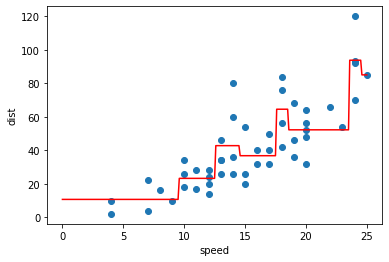

Best parameters: {'max_depth': 3}
R^2 score: 0.76 (0.66, 0.87)


In [12]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from confint import regression_confint
import pandas as pd

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")
X = cars_df[['speed']].values
y = cars_df['dist']

# setting up grid search
model = DecisionTreeRegressor() 
param_grid = {'max_depth': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)


# plot the best model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

best_model = grid.best_estimator_
# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(best_model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")
plt.show()

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# compute the R^2 score and CI of the best model
rs = best_model.score(X,y)
obs = cars_df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))